# Multivariate Exploration of Data
---

## Non-Positional Encodings for Third Variables

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
fuel_econ = pd.read_csv('support-files/05_Multivariate/fuel-econ.csv')
fuel_econ.head(1)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4


In [3]:
# organize the categories 
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# turn it into a pandas' categorical variable 
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# overwrite the existing column (object) as categorical
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)

In [4]:
# check to see if it worked
fuel_econ['VClass'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3929 entries, 0 to 3928
Series name: VClass
Non-Null Count  Dtype   
--------------  -----   
3929 non-null   category
dtypes: category(1)
memory usage: 4.2 KB


In [5]:
# get only automatic or manual
fuel_econ['trans'].unique()

array(['Automatic (AM6)', 'Automatic (AM-S6)', 'Automatic (S6)',
       'Automatic 8-spd', 'Manual 6-spd', 'Automatic 6-spd',
       'Automatic (S5)', 'Automatic 7-spd', 'Automatic (AV-S6)',
       'Automatic (S8)', 'Manual 7-spd', 'Automatic (AM-S7)',
       'Automatic (S7)', 'Automatic (variable gear ratios)',
       'Manual 5-spd', 'Automatic (AV-S8)', 'Automatic 4-spd',
       'Automatic 5-spd', 'Automatic (AM7)', 'Automatic (AV-S7)',
       'Automatic 9-spd', 'Automatic (AM-S8)', 'Automatic (A1)',
       'Automatic (AM8)', 'Automatic (S9)', 'Automatic (S10)',
       'Automatic (AV-S10)'], dtype=object)

In [6]:
# create new column with only auto or manual info
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])

In [7]:
# check to see if it worked
fuel_econ.head(1)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic


### How to use shape or size to encode a third variable in a scatter plot?

In [8]:
# get a subset of our sample to reduce overplotting
np.random.seed(2018)
sample = np.random.choice(fuel_econ.shape[0], 200, replace=False)
fuel_econ_subset = fuel_econ.loc[sample]

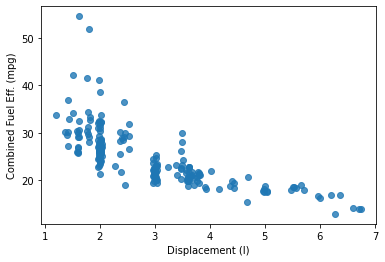

In [9]:
# combine the reduced sample with a small amount of 
# horizontal jitter
sns.regplot(data=fuel_econ_subset, x='displ', y='comb', x_jitter=0.04, fit_reg=False)
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

Are there differences between cars with automatic transmission and manual transmission in terms of fuel efficiency and engine size? 

Since transmission type is categorical, shape is a good encoding to use.

The marker parameter can be used to set the shape of plotted points.

> Note 1: `regplot()` [documentation](https://seaborn.pydata.org/generated/seaborn.regplot.html)

> Note 2: [list](https://matplotlib.org/stable/api/markers_api.html) of matplotlib markers

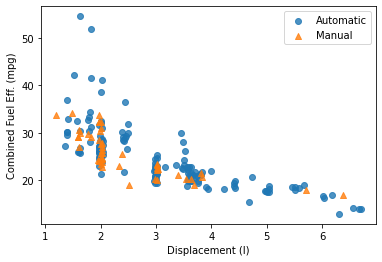

In [10]:
# the parameter can only take a single string,
# thus we need to create a loop to plot each subset of the data
# one by one
# setting this as a list of lists instead of a dict
# let us have finer control of the order in which the levels
# are plotted 
ttype_markers = [['Automatic', 'o'],
                ['Manual', '^']]

# loop over the list elements
for ttype, marker in ttype_markers:
    plot_data = fuel_econ_subset.loc[fuel_econ_subset['trans_type'] == ttype]
    sns.regplot(data=plot_data, x='displ', y='comb', x_jitter=0.04, fit_reg=False, marker=marker)
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.legend(['Automatic', 'Manual']);

Instead of transmission type, what if we wanted to add carbon dioxide as a third variable?

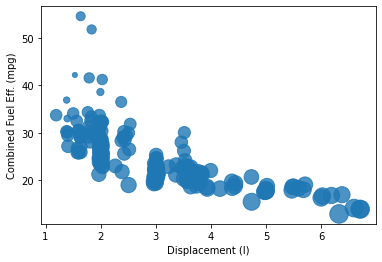

In [11]:
# use marker size ('s') to represent CO2
# as engine size increases, there is a higher level of C02 emissions
# the less fuel efficient cars also tend to have higher emissions
sns.regplot(data=fuel_econ_subset, x='displ', y='comb', 
            x_jitter=0.04, fit_reg=False, scatter_kws={'s': fuel_econ_subset['co2']/2})
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

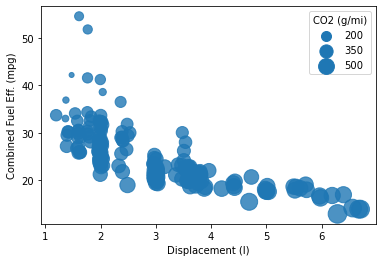

In [12]:
# setting a legend for this plot

sns.regplot(data=fuel_econ_subset, x='displ', y='comb', 
            x_jitter=0.04, fit_reg=False, scatter_kws={'s': fuel_econ_subset['co2']/2})
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# three C02 values we want to use for the size legend reference
sizes = [200, 350, 500]

# set up a list to store all of our dummy scatter plot objects
legend_obj = []

# add dummy scatter plot sequences to construct our legend
for s in sizes: 
    # the first two arguments for x and y positions are empty lists
    # so no points are actually plotted
    legend_obj.append(plt.scatter([],[],s=s/2, color=sns.color_palette()[0]))
    
# the first argument is a list of objects to be depicted in the legend
# the second one is a list of labels
# the third is the legend title to give the units of the legend values
plt.legend(legend_obj, sizes, title = 'CO2 (g/mi)');

## Color Palettes

> Note: `sns.FacetGrid()` [documentation](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html?highlight=facetgrid#seaborn.FacetGrid)

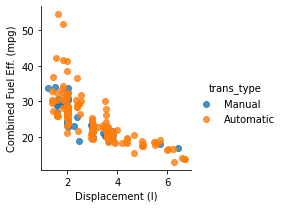

In [13]:
# for categorical data, we can use
# Seaborn's FacetGrid and set the hue argument
# to our column of choice
g = sns.FacetGrid(data=fuel_econ_subset, hue='trans_type')
g.map(sns.regplot, 'displ', 'comb', x_jitter=0.04, fit_reg=False)
g.add_legend()

plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

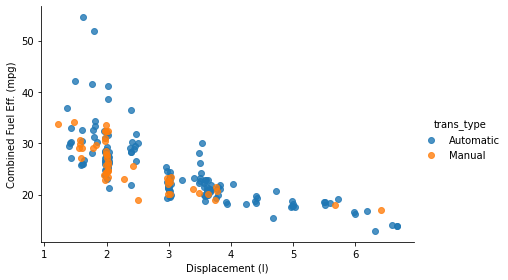

In [14]:
# making a few tweaks to the plot
# first, let's change the order in which the levels
# are plotted, so that the manual transmission points
# are plotted on top of automatic

# transmission type is a qualitative variable, so the default
# qualitative palette works great

g = sns.FacetGrid(data=fuel_econ_subset, hue='trans_type',
                 hue_order=['Automatic', 'Manual'], height=4, aspect=1.5)
g.map(sns.regplot, 'displ', 'comb', x_jitter=0.04, fit_reg=False)
g.add_legend()

plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

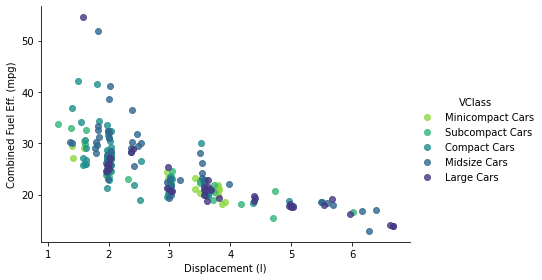

In [15]:
# plotting by vehicle class, an ordered variable
# a sequential palette would work better
# viridis_r goes from light to dark and it also has
# a good range of hues to further discriminate the 
# categorical variables
g = sns.FacetGrid(data=fuel_econ_subset, hue='VClass',
                 height=4, aspect=1.5, palette='viridis_r')
g.map(sns.regplot, 'displ', 'comb', x_jitter=0.04, fit_reg=False)
g.add_legend()

plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

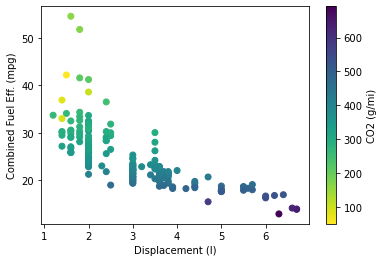

In [16]:
# what if we have a numerical variable instead?
# facetgrid only expects to facet across categorical variables
# so we should just use plt.scatter instead 
plt.scatter(data=fuel_econ_subset, x='displ', y='comb', c ='co2', cmap='viridis_r')
plt.colorbar(label='CO2 (g/mi)')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

In [17]:
# standard qualitative palette
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [18]:
# sequential palette
sns.color_palette('viridis', 10)

[(0.283072, 0.130895, 0.449241),
 (0.262138, 0.242286, 0.520837),
 (0.220057, 0.343307, 0.549413),
 (0.177423, 0.437527, 0.557565),
 (0.143343, 0.522773, 0.556295),
 (0.119512, 0.607464, 0.540218),
 (0.166383, 0.690856, 0.496502),
 (0.319809, 0.770914, 0.411152),
 (0.525776, 0.833491, 0.288127),
 (0.762373, 0.876424, 0.137064)]

In [19]:
# diverding palette
sns.color_palette('vlag', 10)

[(0.34125337, 0.50923419, 0.73874905),
 (0.49566225, 0.60454154, 0.76238852),
 (0.64061445, 0.70437326, 0.80497621),
 (0.79159841, 0.81658489, 0.86776906),
 (0.93827772, 0.9322888, 0.94432312),
 (0.96784372, 0.91616744, 0.91126063),
 (0.90235365, 0.77267117, 0.76467793),
 (0.84190106, 0.62760645, 0.61740899),
 (0.7862306, 0.49245398, 0.48267247),
 (0.72743485, 0.35773314, 0.35378465)]

### Warnings on Color
There are a couple of things to be aware of in general, when working with color. First of all, try and consider color blindness when selecting color for your plots. You don't want your visualization to shut out the 8% of the population that have some kind of color vision deficiency. Fortunately, the built-in color palettes highlighted in the previous section should minimize these concerns. If you use a different, or custom palette, it might be worth checking your visualization's interpretability through a color blindness simulator like [this one](http://www.color-blindness.com/coblis-color-blindness-simulator/).

Secondly, you want to be aware of the effect of transparency and overlap on interpretability. If points of different color on a qualitative scale overlap, the result may be a third color that cannot be matched to something in the palette. If multiple points on a quantitative scale overlap, then the result may be a value that does not actually exist in the data. To be safe here, avoid or minimize transparency in plots with color. You may need to plot only a sample of your points in order to make sure that the effect of the third variable is clearly visible.

### Encodings Practice
**Task 1**: To start, let's look at the relationship between the Pokémon combat statistics of Speed, Defense, and Special-Defense. If a Pokémon has higher defensive statistics, does it necessarily sacrifice speed? Create a single plot to depict this relationship.

In [20]:
pokemon = pd.read_csv('support-files/05_Multivariate/pokemon.csv')
pokemon.head(1)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65


In [21]:
poke_sample = np.random.choice(pokemon.shape[0], 200, replace=False)
pokemon_subset = pokemon.loc[poke_sample]

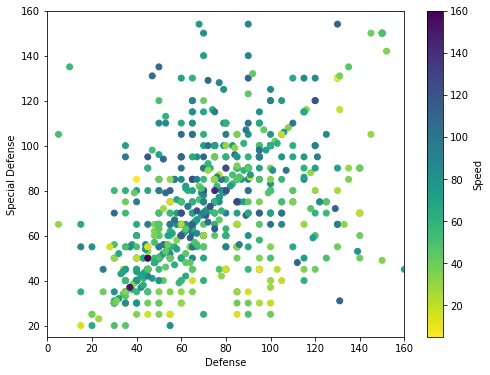

In [22]:
plt.figure(figsize=[8,6])
plt.scatter(data=pokemon, x='defense', y='special-defense', c='speed', cmap='viridis_r')
plt.colorbar(label='Speed')
plt.xlabel('Defense')
plt.ylabel('Special Defense')
plt.xlim(0,160)
plt.ylim(15,160);

From the plot as given, I see a slight increase in speed as both defense and special defense increase. However, the brightest points seem to be clumped up in the center in the 60-80 defense and special defense ranges with the two darkest points on the lower left of the diagonal.

**Task 2**: How do weights and heights compare between Fairy type Pokémon and Dragon type Pokémon? You may want to subset your dataframe before proceeding with the plotting code. **Hint**: If you remember from the univariate plots lesson, one of your axis variables may need to be transformed. If you plan on using FacetGrid, its `.set()` method will be vital for adjusting the axis scaling and tick marks. Check the [last example in the Seaborn documentation](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) for an example of how the `.set()` method is used, and the [matplotlib documentation of the Axes class](https://matplotlib.org/api/axes_api.html) for properties that you might want to set.

In [23]:
pokemon.head(1)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65


In [24]:
# reshaping df so that all pokémon types are recorded
# in a single column
type_cols = ['type_1', 'type_2']
non_type_cols = pokemon.columns.difference(type_cols)

pkmn_types = pokemon.melt(id_vars=non_type_cols,
                         value_vars=type_cols,
                         var_name='type_level',
                         value_name='type').dropna()
pkmn_types.head()

,attack,base_experience,defense,generation_id,height,hp,id,special-attack,special-defense,species,speed,weight,type_level,type
0,49,64,49,1,0.7,45,1,65,65,bulbasaur,45,6.9,type_1,grass
1,62,142,63,1,1.0,60,2,80,80,ivysaur,60,13.0,type_1,grass
2,82,236,83,1,2.0,80,3,100,100,venusaur,80,100.0,type_1,grass
3,52,62,43,1,0.6,39,4,60,50,charmander,65,8.5,type_1,fire
4,64,142,58,1,1.1,58,5,80,65,charmeleon,80,19.0,type_1,fire


In [25]:
# getting a subset of our df only containing the fairy
# and dragon types
fairy_and_dragon = pkmn_types.query('type == "fairy" or type == "dragon"')
fairy_and_dragon.head()

,attack,base_experience,defense,generation_id,height,hp,id,special-attack,special-defense,species,speed,weight,type_level,type
34,45,113,48,1,0.6,70,35,60,65,clefairy,35,7.5,type_1,fairy
35,70,217,73,1,1.3,95,36,95,90,clefable,60,40.0,type_1,fairy
146,64,60,45,1,1.8,41,147,50,50,dratini,50,3.3,type_1,dragon
147,84,147,65,1,4.0,61,148,70,70,dragonair,70,16.5,type_1,dragon
148,134,270,95,1,2.2,91,149,100,100,dragonite,80,210.0,type_1,dragon


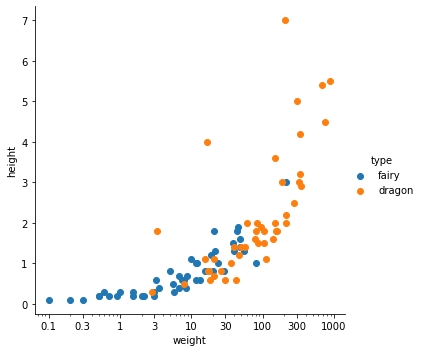

In [26]:
g = sns.FacetGrid(data=fairy_and_dragon, hue='type', height=5)
g.map(plt.scatter, 'weight', 'height')
g.add_legend()
g.set(xscale = 'log') # need to set scaling before customizing ticks
x_ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
g.set(xticks=x_ticks, xticklabels=x_ticks);

The plot shows the drastic difference in sizes and weights for the Fairy and Dragon Pokemon types.

## Faceting in Two Directions

FacetGrid also allows for faceting a variable not just by columns, but also by rows. We can set one categorical variable on each of the two facet axes for one additional method of depicting multivariate trends.

Setting `margin_titles = True` means that instead of each facet being labeled with the combination of row and column variable, labels are placed separately on the top and right margins of the facet grid. This is a boon, since the default plot titles are usually too long.

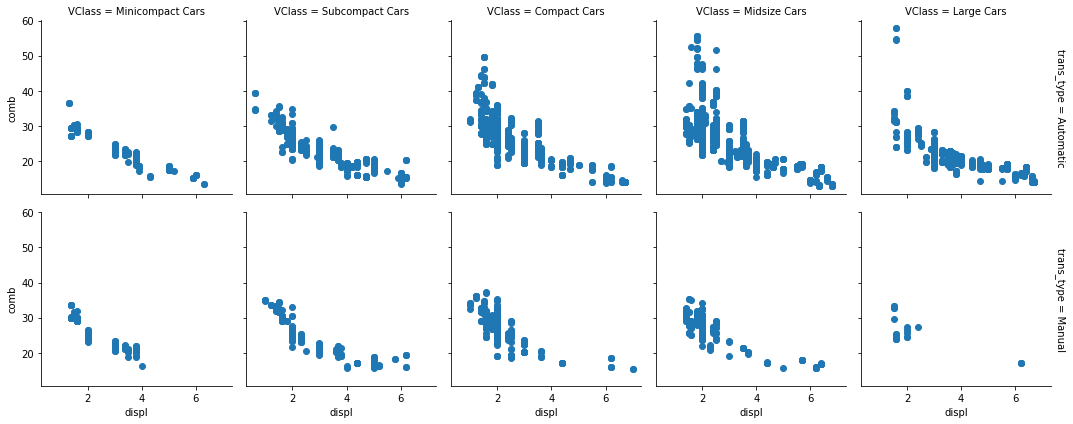

In [27]:
g = sns.FacetGrid(data=fuel_econ, col='VClass', row='trans_type', margin_titles=True)
g.map(plt.scatter, 'displ', 'comb');

## Other Adaptations of Bivariate Plots


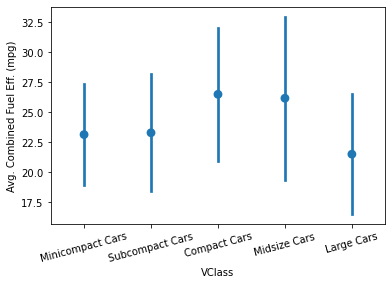

In [28]:
# bivariate plot
sns.pointplot(data=fuel_econ, x='VClass', y='comb', ci='sd', linestyles="")
plt.xticks(rotation=15)
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

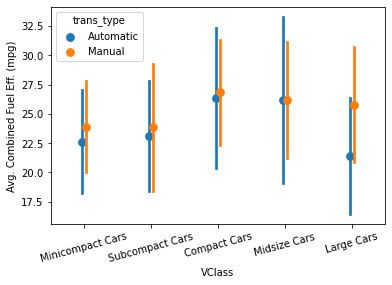

In [29]:
# extend chart into a multivariate plot by adding transmission type
sns.pointplot(data=fuel_econ, x='VClass', y='comb', hue='trans_type', 
             dodge=True, ci='sd', linestyles="")
plt.xticks(rotation=15)
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

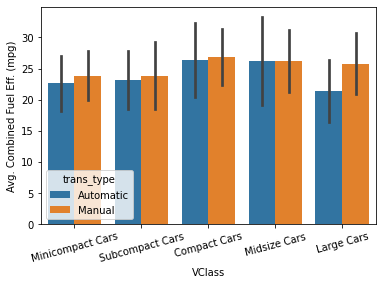

In [30]:
# alternatively, we could change the point plot function
# into a bar plot function
sns.barplot(data=fuel_econ, x='VClass', y='comb', hue='trans_type', ci='sd')
plt.xticks(rotation=15)
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

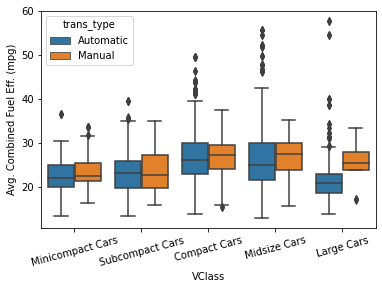

In [31]:
# we could also get a clustered box plot
sns.boxplot(data=fuel_econ, x='VClass', y='comb', hue='trans_type')
plt.xticks(rotation=15)
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

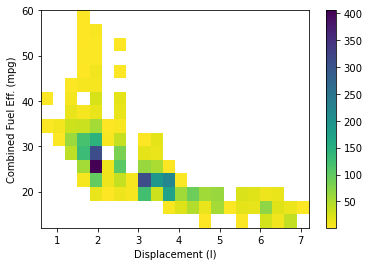

In [32]:
# we can also adapt heat means, so that instead of color
# being based on count, color is based on the mean
# of a third variable
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
plt.hist2d(data=fuel_econ, x='displ', y='comb', cmin=0.5, 
          cmap='viridis_r', bins=[bins_x, bins_y])
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.colorbar();

In [33]:
# first, we need to compute in which bin each point falls
displ_bins = pd.cut(fuel_econ['displ'], bins_x, right=False, include_lowest=False,
                   labels=False).astype(int)
comb_bins = pd.cut(fuel_econ['comb'], bins_y, right=False, include_lowest=False,
                  labels=False).astype(int)

In [34]:
# next, we count up the number of points that fall in each bin
n_points = fuel_econ.groupby([displ_bins, comb_bins]).size()

In [35]:
# this multiindex series is hard to work with, 
# so we'll use reset index and pivot to put the counts
# in array form
n_points = n_points.reset_index().pivot(index='displ', columns='comb').values

In [36]:
# finally, we use the values attribute to get 
# the number of points as an array

# we take the co2 series and divide each element by the number
# of points in each bin, using the cut bins vectors for indexing
# into the right plces 
co2_weights = fuel_econ['co2'] / n_points[displ_bins, comb_bins]

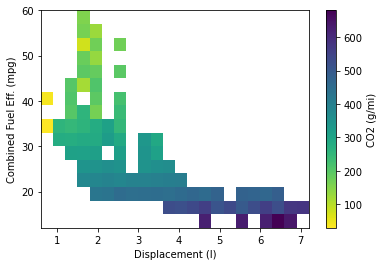

In [37]:
# we add the weights to the weights parameter
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
plt.hist2d(data=fuel_econ, x='displ', y='comb', cmin=0.5,
          cmap='viridis_r', bins=[bins_x, bins_y], weights=co2_weights)
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.colorbar(label='CO2 (g/mi)');

### Adapted Plot Pratice

**Task 1**: Plot the city ('city') vs. highway ('highway') fuel efficiencies (both in mpg) for each vehicle class ('VClass'). Don't forget that vehicle class is an ordinal variable with levels {Minicompact Cars, Subcompact Cars, Compact Cars, Midsize Cars, Large Cars}.

In [38]:
fuel_econ[['city', 'highway']].describe()

,city,highway
count,3929.000000,3929.000000
mean,21.830462,29.973842
std,6.246273,5.747571
min,10.540200,16.559400
25%,17.746900,25.754200
50%,20.823200,29.633800
75%,24.981400,33.773100
max,57.808800,59.416900


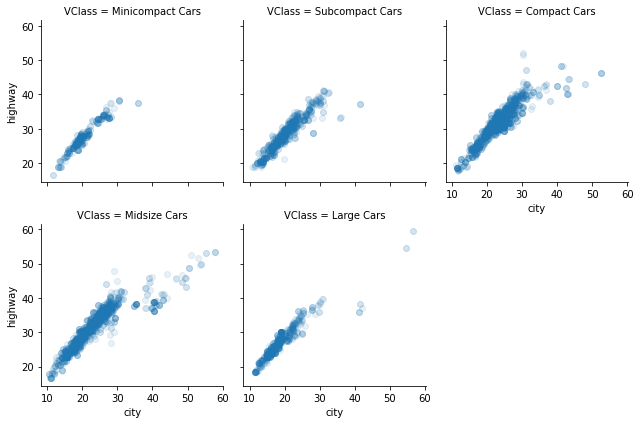

In [39]:
g = sns.FacetGrid(data=fuel_econ, col='VClass', col_wrap=3)
g.map(sns.regplot, 'city', 'highway', x_jitter=0.04, scatter_kws={'alpha': 1/10}, fit_reg=False);

Due to overplotting, I've taken a faceting approach to this task. There don't seem to be any obvious differences in the main cluster across vehicle classes, except that the minicompact and large sedans' arcs are thinner than the other classes due to lower counts. The faceted plots clearly show that most of the high-efficiency cars are in the mid-size and compact car classes.

**Task 2**: Plot the relationship between engine size ('displ', in liters), vehicle class, and fuel type ('fuelType'). For the lattermost feature, focus only on Premium Gasoline and Regular Gasoline cars. What kind of relationships can you spot in this plot?

In [40]:
fuel_econ['fuelType'].unique()

array(['Premium Gasoline', 'Regular Gasoline', 'Diesel',
       'Midgrade Gasoline', 'Natural Gas'], dtype=object)

In [41]:
gas_subset = fuel_econ.query('fuelType == "Premium Gasoline" or fuelType == "Regular Gasoline"')
gas_subset.head(2)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic


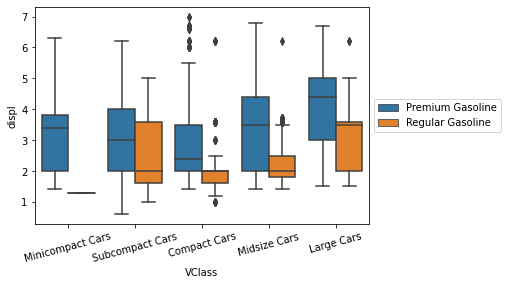

In [42]:
sns.boxplot(data=gas_subset, x='VClass', y='displ', hue='fuelType')
plt.xticks(rotation=15)
plt.legend(loc=6, bbox_to_anchor=(1.0, 0.5));

I went with a clustered box plot on this task since there were too many levels to make a clustered violin plot accessible. The plot shows that in each vehicle class, engine sizes were larger for premium-fuel cars than regular-fuel cars. Engine size generally increased with vehicle class within each fuel type, but the trend was noisy for the smallest vehicle classes.

## Plot Matrices

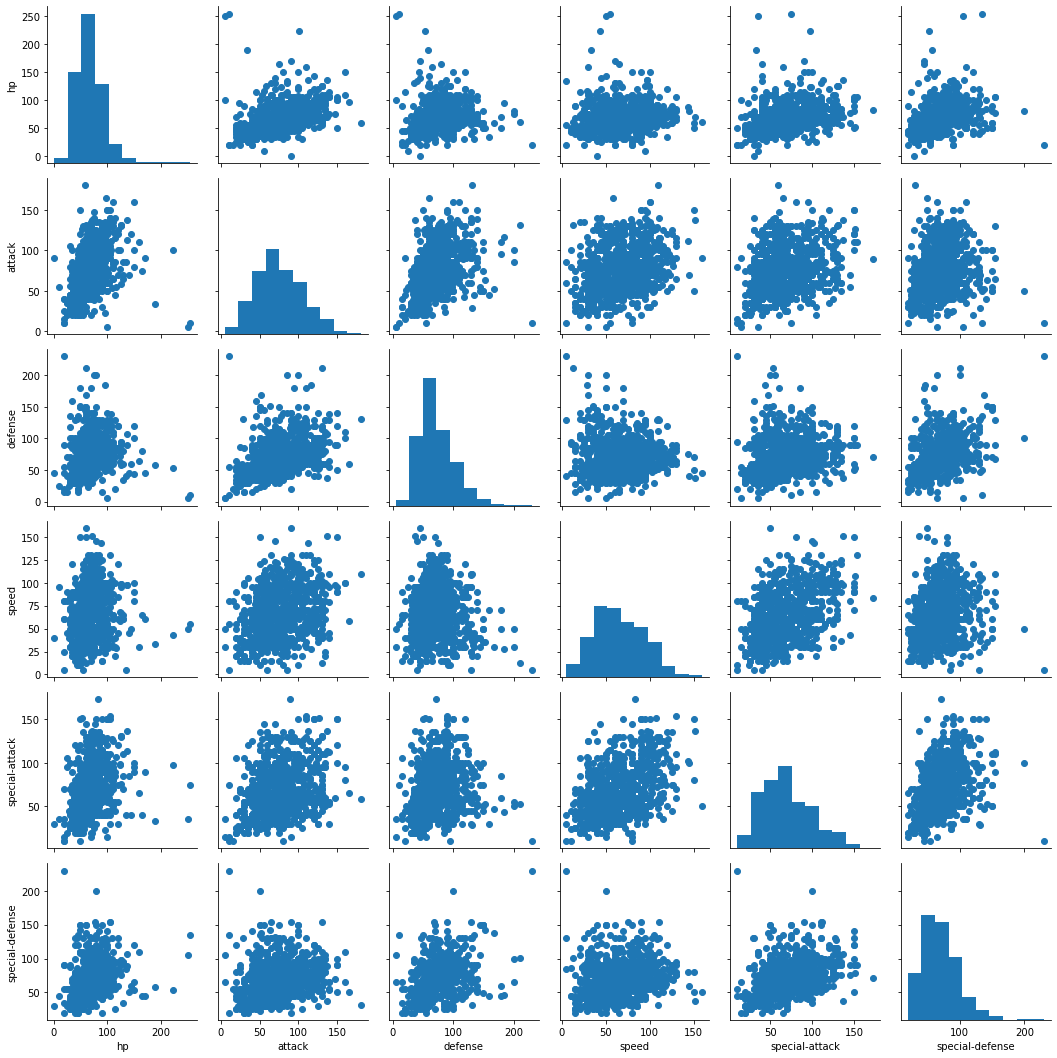

In [43]:
# if vars is not specified, then all numeric variables in the dataframe
# will be put into the plot
pkmn_stats = ['hp', 'attack', 'defense', 'speed', 'special-attack', 'special-defense']
g = sns.PairGrid(data=pokemon, vars=pkmn_stats)
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist);

Looking at this plot matrix, we can see a strong relationship between `hp and attack`, `attack and defense`, and `special attack and special defense`.

Let's check this numerically by checking the correlations and plotting them in a correlation heatmap.

In [44]:
# the corr() method gives us the correlations
pokemon[pkmn_stats].corr()

,hp,attack,defense,speed,special-attack,special-defense
hp,1.000000,0.433318,0.231540,0.169512,0.377446,0.367949
attack,0.433318,1.000000,0.435514,0.335289,0.325937,0.202138
defense,0.231540,0.435514,1.000000,-0.023866,0.199560,0.508688
speed,0.169512,0.335289,-0.023866,1.000000,0.440411,0.202847
special-attack,0.377446,0.325937,0.199560,0.440411,1.000000,0.481345
special-defense,0.367949,0.202138,0.508688,0.202847,0.481345,1.000000


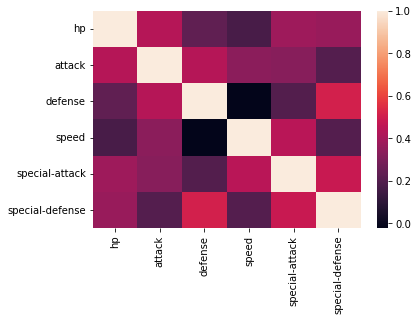

In [45]:
# putting it into a heatmap function produces our desired visualization
sns.heatmap(pokemon[pkmn_stats].corr());

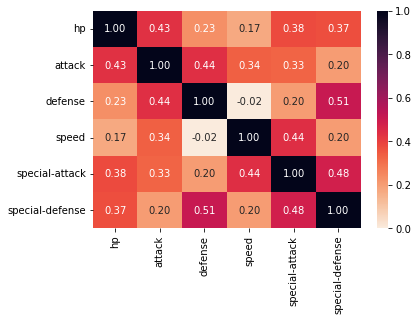

In [46]:
# tweaking heat map
sns.heatmap(pokemon[pkmn_stats].corr(), cmap='rocket_r', annot=True, fmt='.2f', vmin=0);

The correlation heatmap supports the observations we made from the plot matrix. We see that there are relatively high correlation values between hp and attack, attack and defense, and special attack and special defense. It looks there is a especially high correlation between defense and special defense. Looking back at the plot matrix, there is an outlier at the upper right that's perhaps boosting the statistic. That point would be worth further investigation in a deeper dive.

## Feature Engineering

This is not so much an additional technique for adding variables to your plot, but a reminder that feature engineering is a tool that you can leverage as you explore and learn about your data. As you explore a dataset, you might find that two variables are related in some way. Feature engineering is all about creating a new variable with a sum, difference, product, or ratio between those original variables that may lend a better insight into the research questions you seek to answer.

Biases in Pokémon creatures statistics. Are a creature's offensive stats biased towards physical or special-attack if their defensive stats are similarly biased towards physical or special defense?

In [47]:
# ratio between attack and special attack
pokemon['atk_ratio'] = pokemon['attack'] / pokemon['special-attack']
pokemon['def_ratio'] = pokemon['defense'] / pokemon['special-defense']

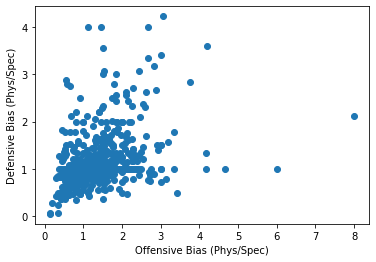

In [48]:
plt.scatter(data=pokemon, x='atk_ratio', y='def_ratio')
plt.xlabel('Offensive Bias (Phys/Spec)')
plt.ylabel('Defensive Bias (Phys/Spec)');

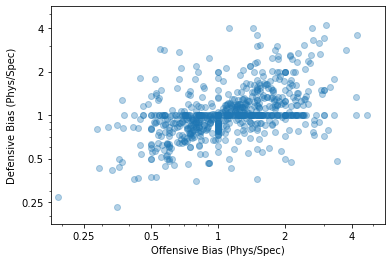

In [49]:
# polishing things up
plt.scatter(data=pokemon, x='atk_ratio', y='def_ratio', alpha=1/3)
plt.xlabel('Offensive Bias (Phys/Spec)')
plt.ylabel('Defensive Bias (Phys/Spec)')
plt.xscale('log')
plt.yscale('log')
tick_loc = [0.25, 0.5, 1, 2, 4]
plt.xticks(tick_loc, tick_loc)
plt.yticks(tick_loc, tick_loc)
plt.xlim(2 ** -2.5, 2 ** 2.5)
plt.ylim(2 ** -2.5, 2 ** 2.5);

We see that most points seem to fall along a diagonal line. In the upper right-hand quadrant, we have Pokémon species that are physical biased in both offense and defense. In the lower left-hand quadrant, we have Pokémon species that are special-biased in both offense and defense. Interestingly, there seems to be a lot of Pokémon on the `y = 1` line, showing no defensive bias.

Findings like these would be much more difficult to come by and summarize if we didn't build our engineered features.

## How Much is Too Much?
By now, you've seen a lot of ways of expanding the number of variables that can be depicted in a single visualization. The basic positional axes can handle two variables: one on the horizontal and one on the vertical. You can facet by both columns and rows to add up to two variables. Encodings in shape, size, and color could add as many as three more. However, you should try and resist the temptation to overuse your newfound power, and to instead practice some restraint in the number of variables that you include in any one plot.

When you have only two variables plotted, A and B, you have only one relationship to understand. Add in a third variable C, and you have three pairwise relationships: A vs. B, A vs. C, and B vs. C. You also need to consider one interaction effect between all three variables: Does the value of C affect the relationship between A and B? With a fourth variable, you have six possible pairwise relationships and four different three-variable interaction effects. This exponential explosion of possible relationships with the number of variables means that there is a potential for cognitive overload if the data isn't conveyed clearly.

This is why it is so important to approach data exploration systematically, rather than just throw as many variables together as possible immediately. When you move from univariate visualizations to bivariate visualizations, you augment your previous understanding of individual distributions by seeing how they relate to one another. If you look at pairwise visualizations before putting together a trivariate plot, then you will have a clear view to how the interaction, if present, changes your previous understanding of the marginal pairwise relationship.

When you move on to explanatory data visualizations, try to limit the number of variables that are introduced at the same time and make sure that the encoding choices convey the main findings to your reader in the clearest way possible. While it's good to keep a soft limit of about three or four variables in a single visualization, you can exceed this if the trends are clear or you introduce features to your reader in a systematic way.

### Additional Plot Practice

**Task 1**: Practice creating a plot matrix, by depicting the relationship between five numeric variables in the fuel efficiency dataset: 'displ', 'co2', 'city', 'highway', and 'comb'. Do you see any interesting relationships that weren't highlighted previously?

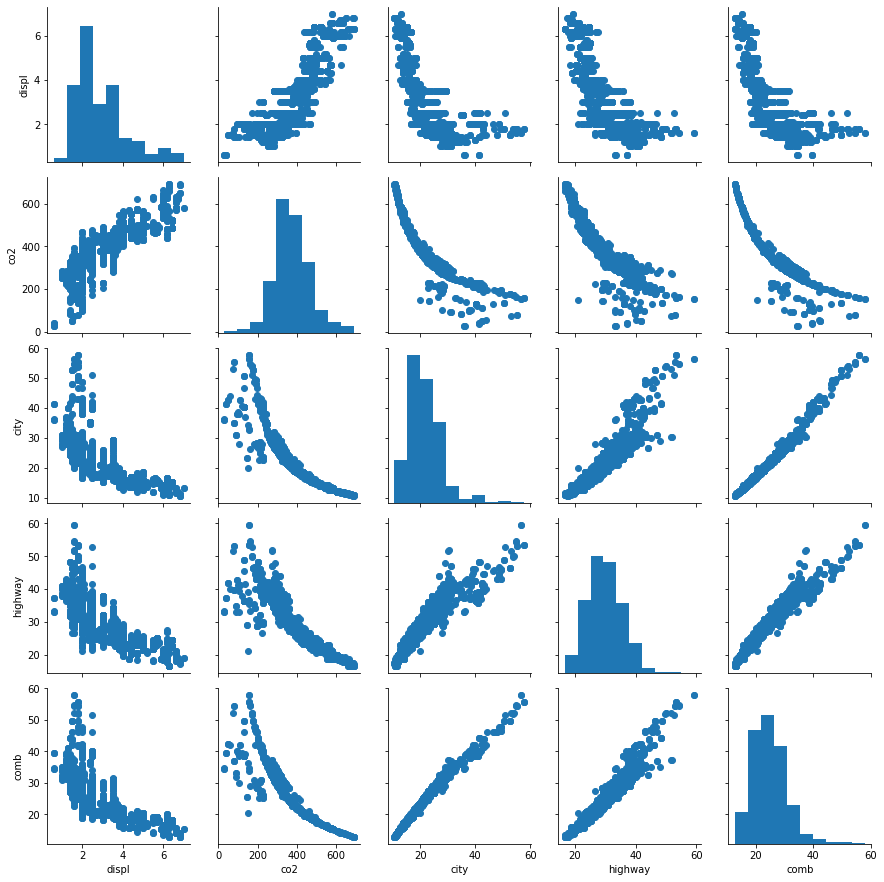

In [50]:
fuel_vars = ['displ', 'co2', 'city', 'highway', 'comb']
g = sns.PairGrid(data=fuel_econ, vars=fuel_vars)
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist);

I set up my PairGrid to plot scatterplots off the diagonal and histograms on the diagonal. The intersections where 'co2' meets the fuel mileage measures are fairly interesting in how tight the curves are.

**Task 2**: The output of the preceding task pointed out a potentially interesting relationship between co2 emissions and overall fuel efficiency. Engineer a new variable that depicts CO2 emissions as a function of gallons of gas (g / gal). (The 'co2' variable is in units of g / mi, and the 'comb' variable is in units of mi / gal.) Then, plot this new emissions variable against engine size ('displ') and fuel type ('fuelType'). For this task, compare not just Premium Gasoline and Regular Gasoline, but also Diesel fuel.

In [51]:
fuel_econ['co2_gal'] = fuel_econ['co2'] * fuel_econ['comb']
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type,co2_gal
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic,8826.0219
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic,8802.7223
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic,8868.1164
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic,8865.3204
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic,8891.2030


In [52]:
gas_subset = fuel_econ.query('fuelType == "Premium Gasoline" or fuelType == "Regular Gasoline" or fuelType == "Diesel"')
gas_subset.head(2)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type,co2_gal
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic,8826.0219
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic,8802.7223


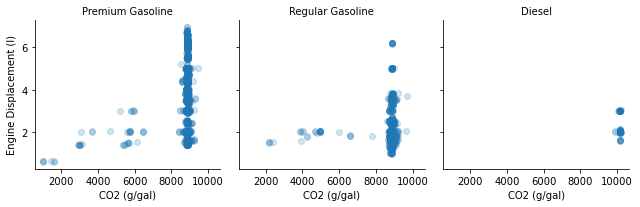

In [53]:
g = sns.FacetGrid(data=gas_subset, col='fuelType')
g.map(sns.regplot, 'co2_gal', 'displ', fit_reg=False, y_jitter=0.04, scatter_kws={'alpha': 1/5})
g.set_ylabels('Engine Displacement (l)')
g.set_xlabels('CO2 (g/gal)')
g.set_titles('{col_name}');

Due to the high number of data points and their high amount of overlap, I've chosen to plot the data in a faceted plot. You can see that engine sizes are smaller for cars that use regular gasoline against those that use premium gas. Most cars fall in an emissions band a bit below 9 kg CO2 per gallon; diesel cars are consistently higher, a little above 10 kg CO2 per gallon. This makes sense, since a gallon of gas gets burned no matter how efficient the process. More strikingly, there's a smattering of points with much smaller emissions. If you inspect these points more closely you'll see that they represent hybrid cars that use battery energy in addition to conventional fuel! To pull these mechanically out of the dataset requires more data than that which was trimmed to create it - and additional research to understand why these points don't fit the normal CO2 bands.

---
## Lesson Summary
In this lesson we covered the following topics:

- Non-Positional Encodings
- Color Palettes
- Faceting in Two Directions
- Adaptations of Bivariate Plots
- Plot Matrices
- Feature Engineering